In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(X_test)


10000

In [6]:
len(X_train)

60000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

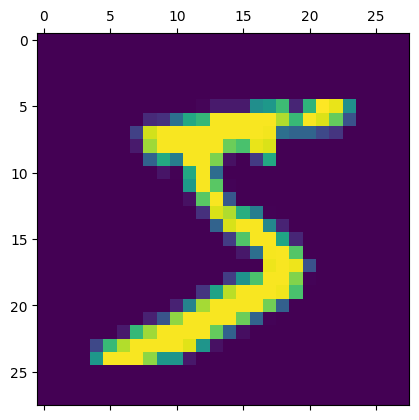

In [9]:
plt.matshow(X_train[0])

In [12]:
y_train[5]

2

In [16]:
y_train[:5
        ]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train=X_train/255
X_test=X_test/255

In [30]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [31]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4758 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9255


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9273


[0.26451048254966736, 0.927299976348877]

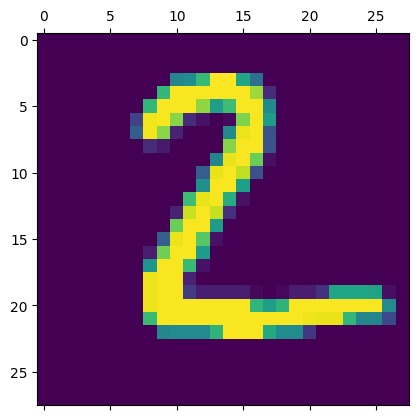

In [50]:
plt.matshow(X_test[1])

In [54]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]
np.argmax(y_predicted[1])

313/313 [==============================] - 0s 1ms/step


2

Confusion matrix: for evaluate performance of a model
                  plot correct and incorrect predictions in the model
        

In [58]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [55]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [59]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    6,    7,    4,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,    8,  933,   13,    8,    3,   13,   12,   36,    2],
       [   3,    0,   22,  919,    0,   24,    2,   13,   21,    6],
       [   1,    1,    4,    2,  918,    0,   11,    4,    9,   32],
       [   9,    3,    3,   32,    9,  776,   16,    8,   31,    5],
       [  10,    3,    7,    1,    7,   11,  915,    2,    2,    0],
       [   1,    5,   22,    4,    6,    0,    0,  965,    2,   23],
       [   6,   10,    6,   20,    9,   27,   10,   14,  867,    5],
       [  11,    7,    1,   11,   26,    9,    0,   35,    4,  905]])>

Text(95.72222222222221, 0.5, 'Truth')

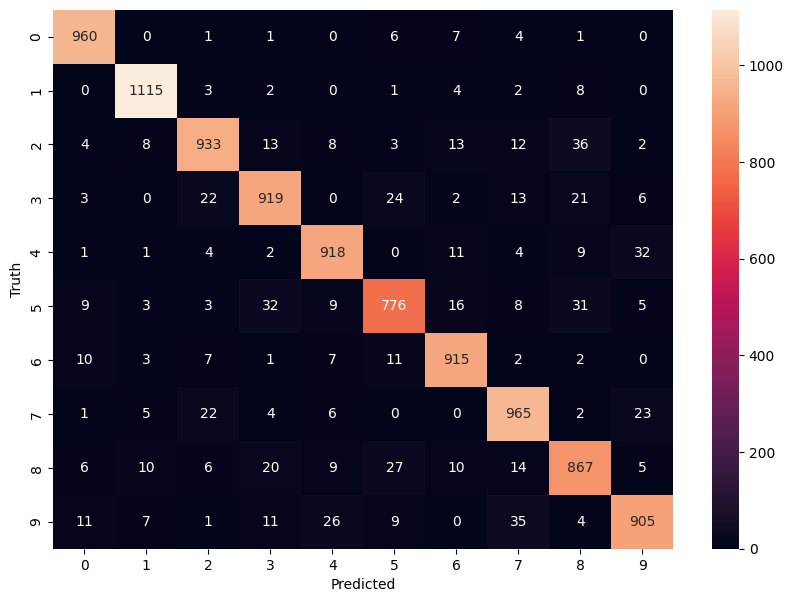

In [61]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2706 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0835 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0641 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0502 - accuracy: 0.9844


In [69]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9770


[0.07858217507600784, 0.9769999980926514]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

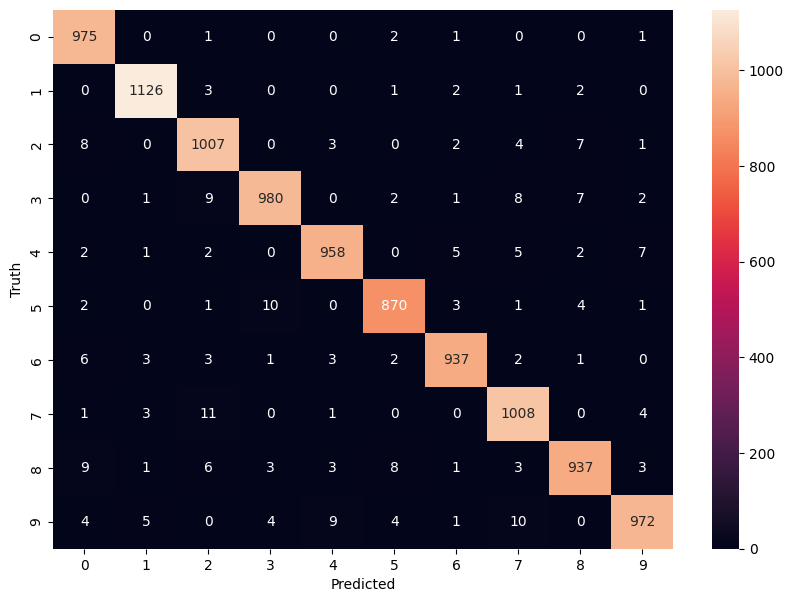

In [71]:
y_predicted=model.predict(X_test_flattened)
y_predicted_label=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

flattening 2D array using keras function

In [77]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2825 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1310 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0907 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0554 - accuracy: 0.9832
